In [195]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from isingutilsslow import get_triu_corr
from isingutilsslow import get_triu_rmse
from isingutilsslow import IsingModel
from isingutilsslow import get_triu_flattened
import time
import math

In [4]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [5]:
data_dir = 'E:\\HCP_data'
results_dir = 'E:\\Ising_model_results_daai'

In [66]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [67]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

group_rmse size torch.Size([1000])
The distribution of FC RMSE of group Ising model fitted to training data values has median 0.0462 with 95% CI [0.0328, 0.0606] and range [0.0241, 0.0737].


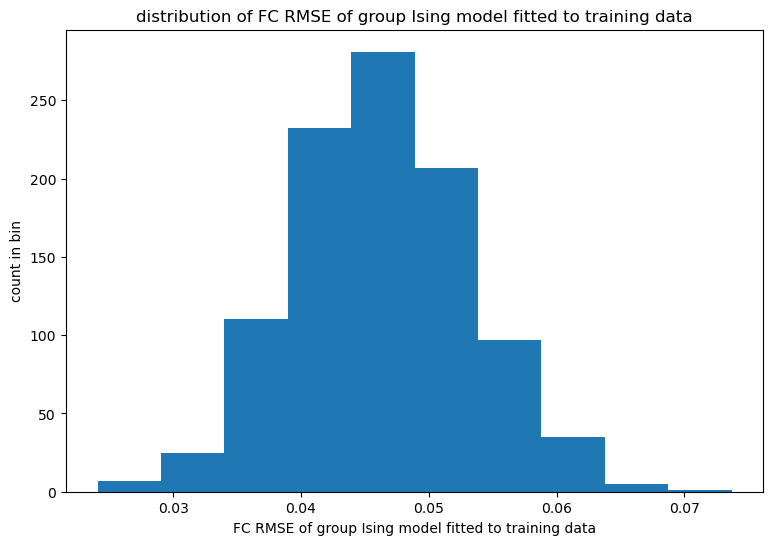

In [70]:
group_rmse = torch.load( os.path.join(results_dir, f'fc_rmse_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_batch_0_epoch_10.pt') )
print( 'group_rmse size', group_rmse.size() )
name = 'FC RMSE of group Ising model fitted to training data'
values = group_rmse
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

training_rmse size torch.Size([10, 669])
The distribution of FC RMSE of individual training subject Ising models values has median 0.0164 with 95% CI [0.0108, 0.0384] and range [0.00715, 0.0722].


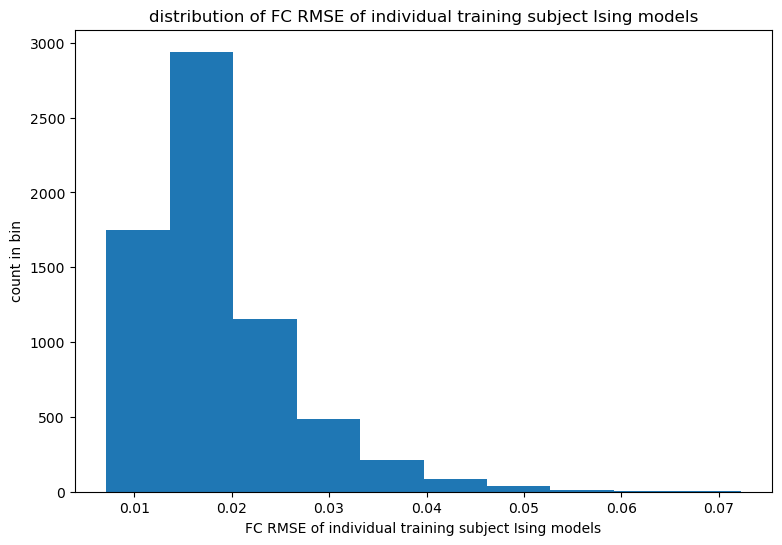

In [26]:
training_rmse = torch.load( os.path.join(results_dir, f'fc_rmse_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_subjects_training_reps_10_batch_0_epoch_4000.pt') )
print( 'training_rmse size', training_rmse.size() )
name = 'FC RMSE of individual training subject Ising models'
values = training_rmse
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

validation_rmse size torch.Size([100, 83])
The distribution of FC RMSE of individual validation subject Ising models values has median 0.0165 with 95% CI [0.0107, 0.0367] and range [0.0081, 0.0593].


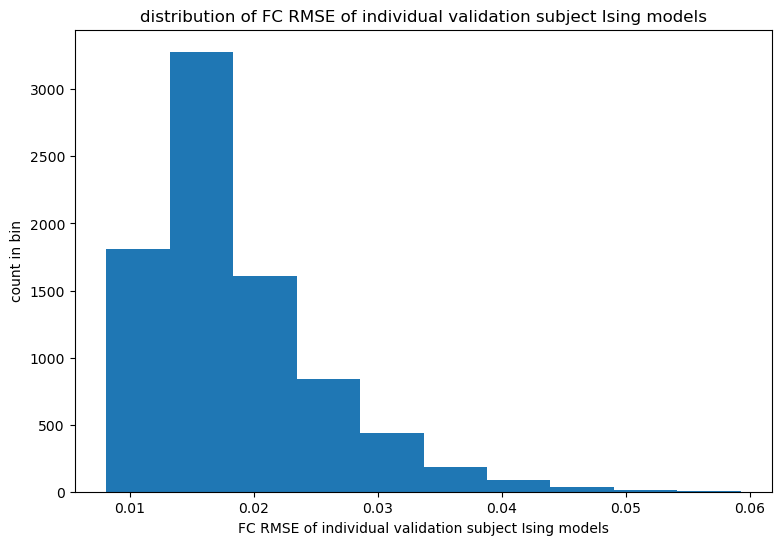

In [30]:
validation_rmse = torch.load( os.path.join(results_dir, f'fc_rmse_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_subjects_validation_reps_100_batch_0_epoch_4000.pt') )
print( 'validation_rmse size', validation_rmse.size() )
name = 'FC RMSE of individual validation subject Ising models'
values = validation_rmse
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

group_corr size torch.Size([1000])
The distribution of FC correlation of group Ising model fitted to training data values has median 0.977 with 95% CI [0.966, 0.986] and range [0.954, 0.989].


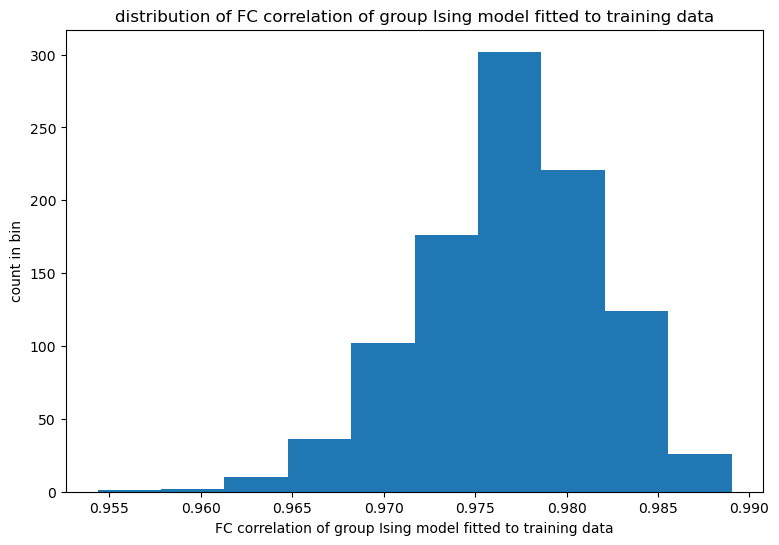

In [74]:
group_corr = torch.load( os.path.join(results_dir, f'fc_corr_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_batch_0_epoch_10.pt') )
print( 'group_corr size', group_corr.size() )
name = 'FC correlation of group Ising model fitted to training data'
values = group_corr
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

training_corr size torch.Size([10, 669])
The distribution of FC correlation of individual training subject Ising models values has median 0.997 with 95% CI [0.992, 0.999] and range [0.983, 0.999].


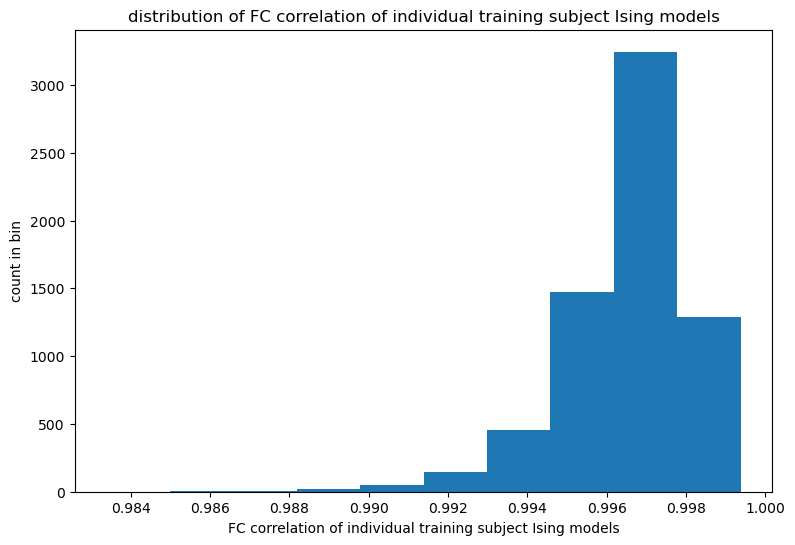

In [28]:
training_corr = torch.load( os.path.join(results_dir, f'fc_corr_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_subjects_training_reps_10_batch_0_epoch_4000.pt') )
print( 'training_corr size', training_corr.size() )
name = 'FC correlation of individual training subject Ising models'
values = training_corr
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

validation_corr size torch.Size([100, 83])
The distribution of FC correlation of individual validation subject Ising models values has median 0.997 with 95% CI [0.993, 0.999] and range [0.983, 0.999].


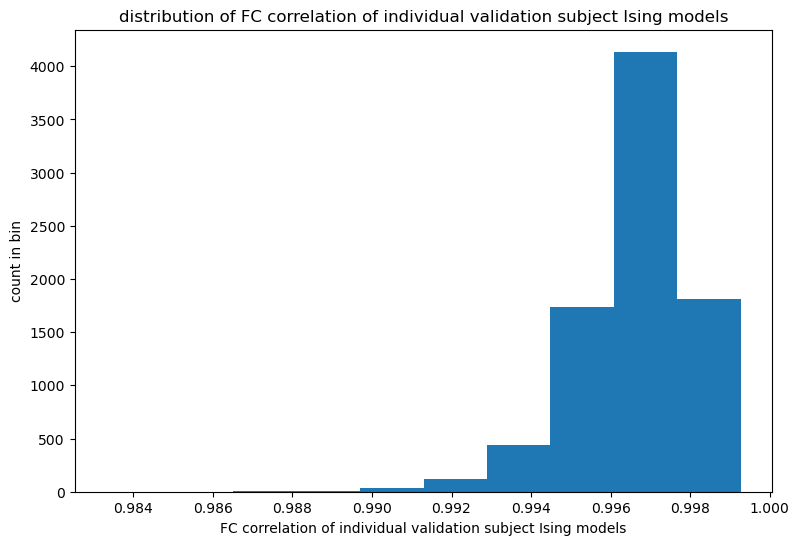

In [34]:
validation_corr = torch.load( os.path.join(results_dir, f'fc_corr_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_subjects_validation_reps_100_batch_1_epoch_4000.pt') )
print( 'validation_corr size', validation_corr.size() )
name = 'FC correlation of individual validation subject Ising models'
values = validation_corr
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

In [57]:
max_diff_fc = torch.load( os.path.join(results_dir, f'max_diff_fc_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_epoch_34_steps_480000.pt') )
max_diff_fim = torch.load( os.path.join(results_dir, f'max_diff_fim_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_epoch_34_steps_480000.pt') )
group_fim = torch.load( os.path.join(results_dir, f'fim_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_batch_0_epoch_34_steps_480000.pt') )
group_sim_fc = torch.load( os.path.join(results_dir, f'fc_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_batch_0_epoch_34_steps_480000.pt') )
print( 'group_fim size', group_fim.size() )

group_fim size torch.Size([1000, 1, 231, 231])


In [47]:
def get_trend_line(x:torch.Tensor, y:torch.Tensor):
    x_with_intercept = torch.stack(  ( x, torch.ones_like(x) ), dim=-1  )
    result = torch.linalg.lstsq( x_with_intercept, y.unsqueeze(dim=1) )
    slope = result.solution[0].item()
    y_intercept = result.solution[1].item()
    y_pred = slope * x + y_intercept
    # result.residuals
    r_squared = (   1 - torch.sum( (y_pred - y).square() )/torch.sum(  ( y - y.mean() ).square()  )   ).item()
    return slope, y_intercept, y_pred, r_squared
print('slope', 'y-intercept', 'R^2')
log_step = torch.log10(  torch.arange( torch.numel(log_max_diff_fc), dtype=log_max_diff_fc.dtype, device=log_max_diff_fc.device ) + 1  )
log_max_diff_fc = max_diff_fc.log10()
slope_fc, y_intercept_fc, log_max_diff_fc_pred, r_squared_fc = get_trend_line(log_step[1:], log_max_diff_fc[1:])
print('FC', slope_fc, y_intercept_fc, r_squared_fc)
log_max_diff_fim = max_diff_fim.log10()
slope_fim, y_intercept_fim, log_max_diff_fim_pred, r_squared_fim = get_trend_line(log_step[1:], log_max_diff_fim[1:])
print('FIM', slope_fim, y_intercept_fim, r_squared_fim)

slope y-intercept R^2
FC -1.000653862953186 0.25012102723121643 0.9999628663063049
FIM -1.0020499229431152 0.48265567421913147 0.9999584555625916


max_diff_fc size torch.Size([480000])


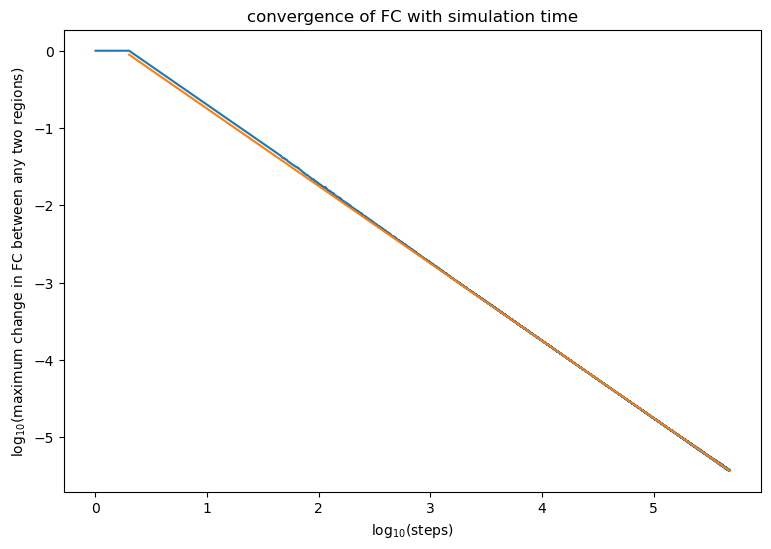

In [50]:
print( 'max_diff_fc size', max_diff_fc.size() )
name = 'Maximimum change in FC between steps vs step'
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( log_step.flatten().detach().cpu().numpy(), log_max_diff_fc.flatten().detach().cpu().numpy(), label='sim' )
axs.plot( log_step[1:].flatten().detach().cpu().numpy(), log_max_diff_fc_pred.flatten().detach().cpu().numpy(), label='trend line' )
# axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
axs.set_xlabel('log$_{10}$(steps)')
axs.set_ylabel('log$_{10}$(maximum change in FC between any two regions)')
axs.set_title(f'convergence of FC with simulation time')
plt.show()

max_diff_fim size torch.Size([480000])


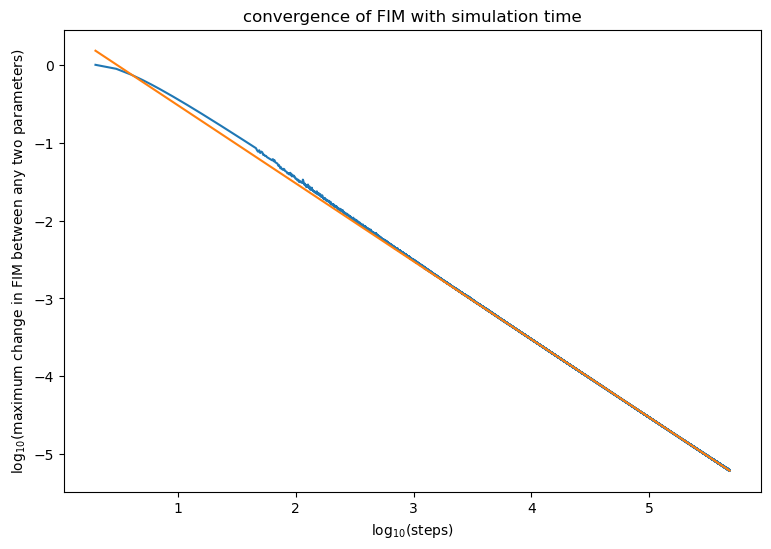

In [51]:
print( 'max_diff_fim size', max_diff_fc.size() )
name = 'Maximimum change in FIM between steps vs step'
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( log_step.flatten().detach().cpu().numpy(), log_max_diff_fim.flatten().detach().cpu().numpy(), label='sim' )
axs.plot( log_step[1:].flatten().detach().cpu().numpy(), log_max_diff_fim_pred.flatten().detach().cpu().numpy(), label='trend line' )
# axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
axs.set_xlabel('log$_{10}$(steps)')
axs.set_ylabel('log$_{10}$(maximum change in FIM between any two parameters)')
axs.set_title(f'convergence of FIM with simulation time')
plt.show()

In [54]:
usual_num_steps = 4800
print(f'FC changes by at most {max_diff_fc[usual_num_steps-1]:.3g} after {usual_num_steps} and by at most {max_diff_fc[-1]:.3g} after {max_diff_fc.numel()} steps.')
print(f'FIM changes by at most {max_diff_fim[usual_num_steps-1]:.3g} after {usual_num_steps} and by at most {max_diff_fim[-1]:.3g} after {max_diff_fc.numel()} steps.')

FC changes by at most 0.000371 after 4800 and by at most 3.7e-06 after 480000 steps.
FIM changes by at most 0.000633 after 4800 and by at most 6.2e-06 after 480000 steps.


In [60]:
group_data_fimlike = torch.load( os.path.join(results_dir, f'data_node_and_edge_covs_group_training_threshold_0.1_window_3211200.pt') )
group_data_fc = torch.load( os.path.join(results_dir, f'data_fc_group_training_threshold_0.1_window_3211200.pt') )
print( 'group_data_fimlike size', group_data_fimlike.size() )

group_data_fimlike size torch.Size([1, 1, 231, 231, 1])


In [61]:
# Squeeze and unsqueeze the dimensions of the sim and data versions so that dimensions match.
group_sim_fc = group_sim_fc.squeeze()
print( 'group_sim_fc size', group_sim_fc.size() )
group_data_fc = group_data_fc.squeeze().unsqueeze(dim=0)
print( 'group_data_fc size', group_data_fc.size() )
group_fim = group_fim.squeeze()
print( 'group_fim size', group_fim.size() )
group_data_fimlike = group_data_fimlike.squeeze().unsqueeze(dim=0)
print( 'group_data_fimlike size', group_data_fimlike.size() )

group_sim_fc size torch.Size([1000, 21, 21])
group_data_fc size torch.Size([1, 21, 21])
group_fim size torch.Size([1000, 231, 231])
group_data_fimlike size torch.Size([1, 231, 231])


In [65]:
group_fc_rmse = get_triu_rmse(group_sim_fc, group_data_fc)
print( 'group_fc_rmse size', group_fc_rmse.size() )
group_fc_corr = get_triu_corr(group_sim_fc, group_data_fc)
print( 'group_fc_corr size', group_fc_corr.size() )
group_fim_rmse = get_triu_rmse(group_fim, group_data_fimlike)
print( 'group_fim_rmse size', group_fc_rmse.size() )
group_fim_corr = get_triu_corr(group_fim, group_data_fimlike)
print( 'group_fim_corr size', group_fc_corr.size() )

group_fc_rmse size torch.Size([1000])
group_fc_corr size torch.Size([1000])
group_fim_rmse size torch.Size([1000])
group_fim_corr size torch.Size([1000])


The distribution of FC RMSE of group Ising model fitted to training data values has median 0.0367 with 95% CI [0.0297, 0.0438] and range [0.0256, 0.0497].


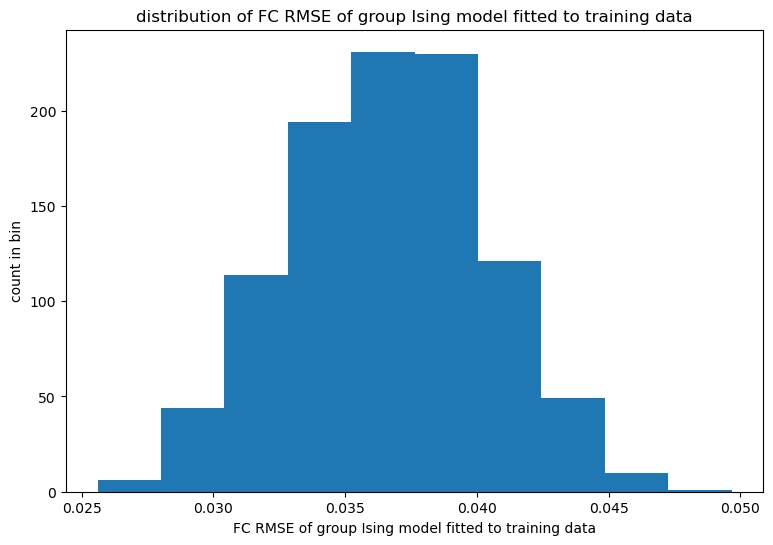

In [68]:
name = 'FC RMSE of group Ising model fitted to training data'
values = group_fc_rmse
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of FC correlation of group Ising model fitted to training data values has median 0.981 with 95% CI [0.977, 0.985] and range [0.973, 0.987].


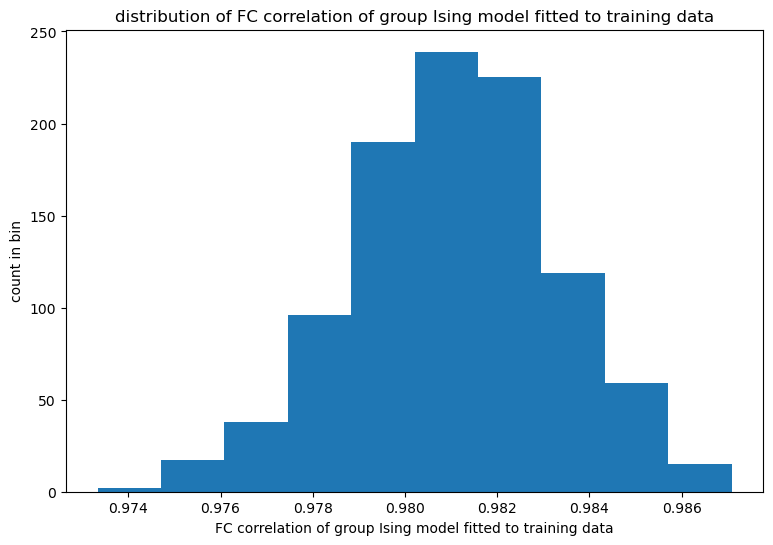

In [71]:
name = 'FC correlation of group Ising model fitted to training data'
values = group_fc_corr
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of RMSE between group Ising model FIM and corresponding covariances of training data values has median 0.0306 with 95% CI [0.0297, 0.0317] and range [0.0293, 0.0325].


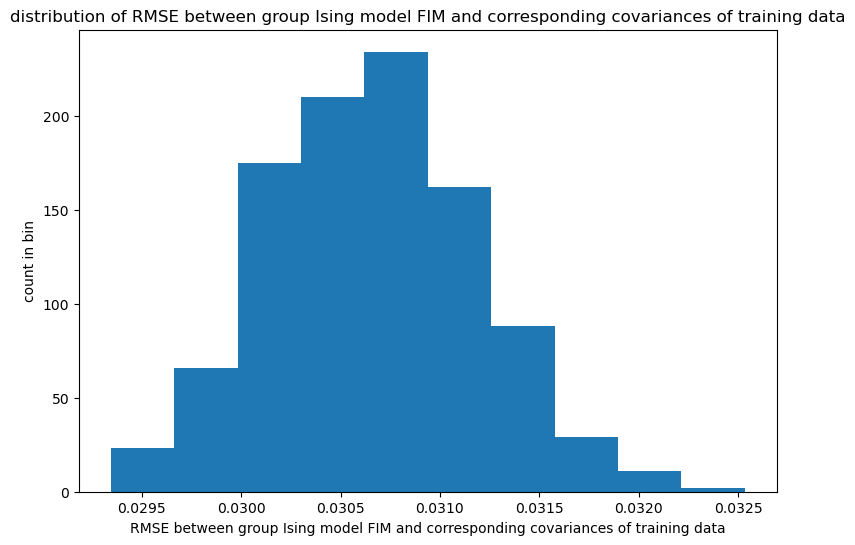

In [76]:
name = 'RMSE between group Ising model FIM and corresponding covariances of training data'
values = group_fim_rmse
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of correlation between group Ising model FIM and corresponding covariances of training data values has median 0.979 with 95% CI [0.975, 0.981] and range [0.973, 0.982].


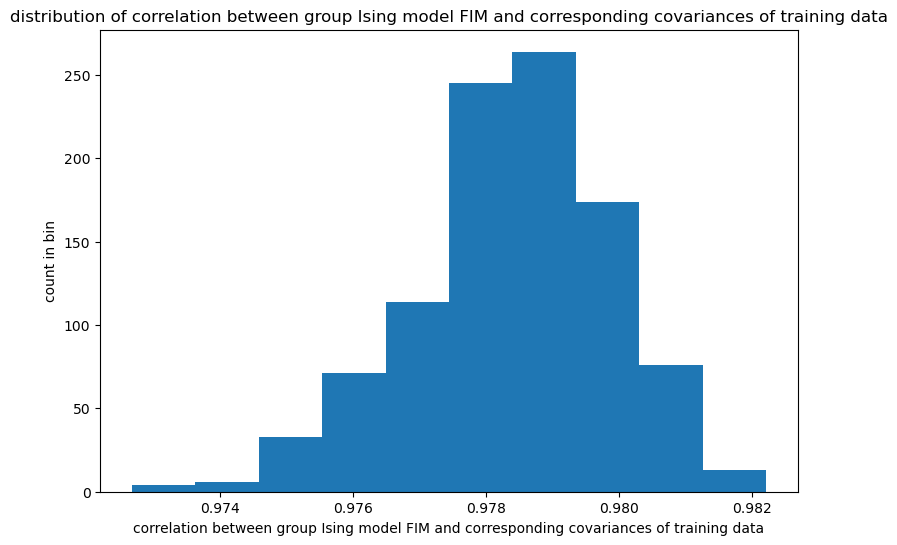

In [77]:
name = 'correlation between group Ising model FIM and corresponding covariances of training data'
values = group_fim_corr
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

In [79]:
best_group_fc_rmse_index = torch.argmin(group_fc_rmse)
best_group_fc_rmse = group_fc_rmse[best_group_fc_rmse_index]
best_group_fim = group_fim[best_group_fc_rmse_index,:,:]
print(f'Group Ising model instance {best_group_fc_rmse_index} has the lowest group FIM FC RMSE, {best_group_fc_rmse:.3g}.')

Group Ising model instance 243 has the lowest group FIM FC RMSE, 0.0256.


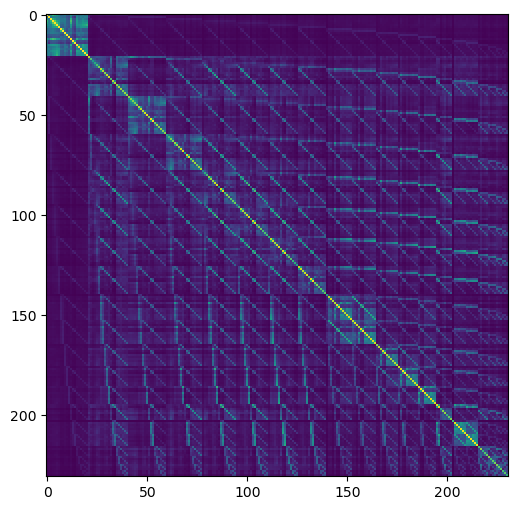

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( best_group_fim.abs().detach().cpu().numpy() )

In [105]:
L_fim, V_fim = torch.linalg.eig(group_fim)
print( 'L_fim size:', L_fim.size() )
print( 'V_fim size:', V_fim.size() )
# Rearrange the columns of V_fim so that they are in descending order by magnitude of the eigenvalue of the best model FIM.
print( 'max imaginary part of L_fim', L_fim.imag.abs().max() )
print( 'min real part of L_fim', L_fim.real.min() )
print( 'max real part of L_fim', L_fim.real.max() )
L_fim_abs_best = L_fim[best_group_fc_rmse_index,:].abs()
L_fim_abs_best, sort_by_L_fim_abs_best_indices = torch.sort(L_fim_abs_best, descending=True)
V_fim = V_fim[:,:,sort_by_L_fim_abs_best_indices]

L_fim size: torch.Size([1000, 231])
V_fim size: torch.Size([1000, 231, 231])
max imaginary part of L_fim tensor(0., device='cuda:0')
min real part of L_fim tensor(0.0683, device='cuda:0')
max real part of L_fim tensor(22.2042, device='cuda:0')


In [122]:
V_fim_real = V_fim.real
V_fim_real_best = V_fim_real[best_group_fc_rmse_index,:,:]
print( 'max imaginary part of V_fim', V_fim.imag.abs().max() )
V_fim_similarity_to_best = torch.nn.functional.cosine_similarity( V_fim_real_best.unsqueeze(dim=0), V_fim_real, dim=1 )
print( 'V_fim_similarity_to_best size', V_fim_similarity_to_best.size() )

max imaginary part of V_fim tensor(0., device='cuda:0')
V_fim_similarity_to_best size torch.Size([1000, 231])


In [146]:
# error bar plot version without log of variances
def plot_ci_errorbars(axs, xlabel:str, ylabel:str, x:torch.Tensor, y:torch.Tensor):
    y_quantiles = torch.quantile( input=y, q=torch.tensor([0.025, 0.5, 0.975], device=y.device), dim=0 )
    # Find the median.
    y_median = y_quantiles[1,:]
    # Find the errors for the extreme values.
    y_below_ext = y_median - y.min(dim=0).values
    y_above_ext = y.max(dim=0).values - y_median
    y_err_ext = torch.stack( (y_below_ext, y_above_ext), dim=0 )
    # Find the error bars for the 95% CI.
    y_below_ci = y_median - y_quantiles[0,:]
    y_above_ci = y_quantiles[2,:] - y_median
    y_err_ci = torch.stack( (y_below_ci, y_above_ci), dim=0 )
    x_np = x.detach().cpu().numpy()
    y_median_np = y_median.detach().cpu().numpy()
    axs.errorbar( x=x_np, y=y_median_np, yerr=y_err_ext.detach().cpu().numpy(), linestyle='', marker='.', markeredgecolor='r', label='range' )
    axs.errorbar( x=x_np, y=y_median_np, yerr=y_err_ci.detach().cpu().numpy(), linestyle='', marker='.', markeredgecolor='g', label='95% CI' )
    axs.plot(x_np, y_median_np, linestyle='', marker='o', markeredgecolor='k', label='median')
    axs.legend()
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(f'{ylabel} vs {xlabel}')

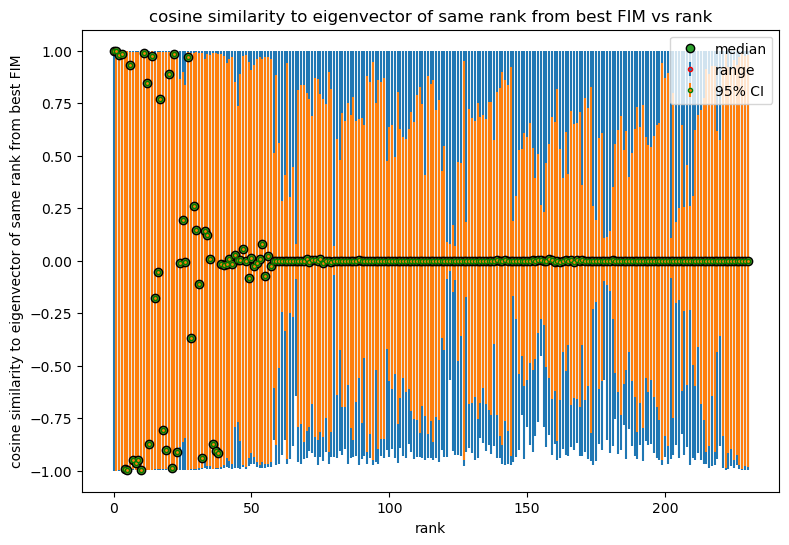

In [147]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
rank = torch.arange( V_fim_similarity_to_best.size(dim=-1), device=device )
plot_ci_errorbars(axs=axs, xlabel='rank', ylabel='cosine similarity to eigenvector of same rank from best FIM', x=rank, y=V_fim_similarity_to_best)

In [148]:
V_fim_similarity_to_neg_best = torch.nn.functional.cosine_similarity( -1.0*V_fim_real[best_group_fc_rmse_index,:,:].unsqueeze(dim=0), V_fim_real, dim=1 )
print( 'V_fim_similarity_to_neg_best size', V_fim_similarity_to_neg_best.size() )
V_fim_similarity_to_best_or_neg = torch.maximum(V_fim_similarity_to_best, V_fim_similarity_to_neg_best)
print( 'V_fim_similarity_to_best_or_neg size', V_fim_similarity_to_best_or_neg.size() )

V_fim_similarity_to_neg_best size torch.Size([1000, 231])
V_fim_similarity_to_best_or_neg size torch.Size([1000, 231])


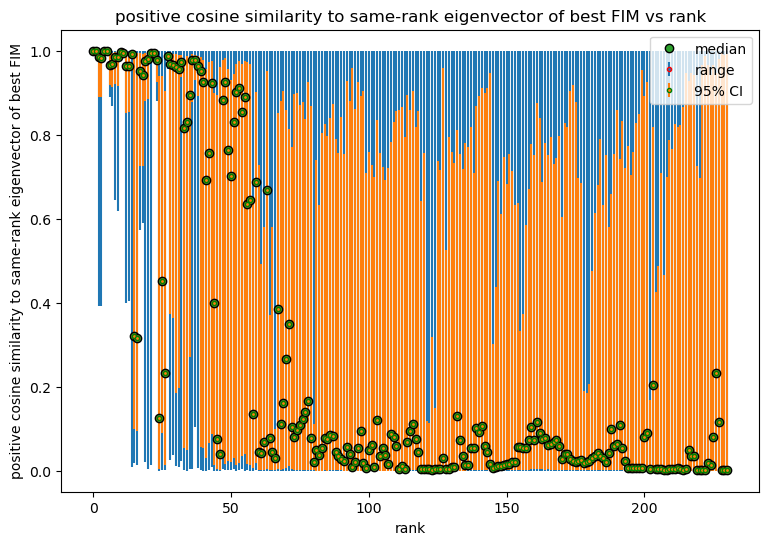

In [149]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
plot_ci_errorbars(axs=axs, xlabel='rank', ylabel='positive cosine similarity to same-rank eigenvector of best FIM', x=rank, y=V_fim_similarity_to_best_or_neg)

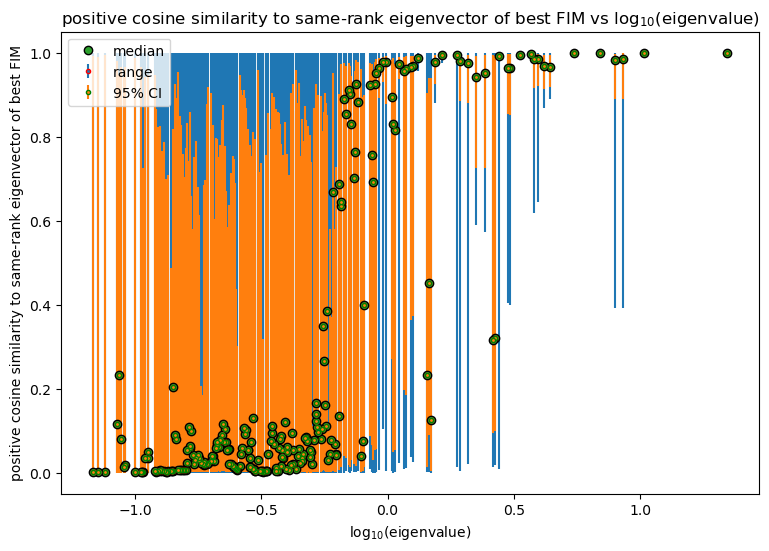

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
plot_ci_errorbars(axs=axs, xlabel='log$_{10}$(eigenvalue)', ylabel='positive cosine similarity to same-rank eigenvector of best FIM', x=torch.log10(L_fim_abs_best), y=V_fim_similarity_to_best_or_neg)

In [116]:
def get_params_vec(model):
    return torch.cat(  ( model.h, get_triu_flattened(model.J_sym) ), dim=-1  )

In [120]:
group_models = torch.load( os.path.join(results_dir, f'ising_model_nodes_21_window_50_lr_0.001_threshold_0.1_beta_0.500_group_training_reps_1000_batch_0_epoch_34.pt') )
group_params = get_params_vec(group_models).squeeze()
print( 'group_params size', group_params.size() )

group_params size torch.Size([1000, 231])


In [125]:
group_params_projected = torch.matmul(group_params, V_fim_real_best)
print( 'group_params_projected size', group_params_projected.size() )
group_params_projected_var = group_params_projected.var(dim=0)
print( 'group_params_projected_var size', group_params_projected_var.size() )

group_params_projected size torch.Size([1000, 231])
group_params_projected_var size torch.Size([231])


Text(0.5, 1.0, 'variance of projection of parameters onto eigenvector of best FIM vs log$_{10}$(eigenvalue)')

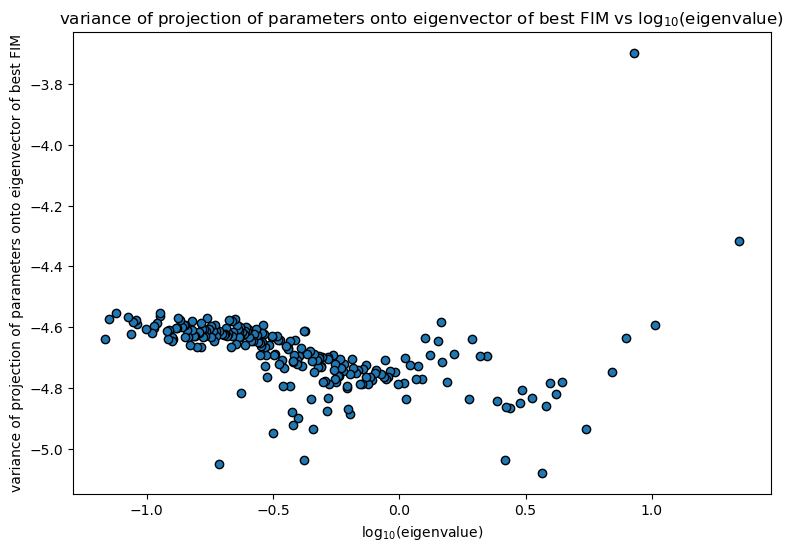

In [129]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
xlabel = 'log$_{10}$(eigenvalue)'
ylabel = 'variance of projection of parameters onto eigenvector of best FIM'
log_group_params_projected_var = torch.log10(group_params_projected_var)
log_L_fim_abs_best = torch.log10(L_fim_abs_best)
axs.plot( log_L_fim_abs_best.detach().cpu().numpy(), log_group_params_projected_var.detach().cpu().numpy(), linestyle='', marker='o', markeredgecolor='k' )
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
axs.set_title(f'{ylabel} vs {xlabel}')

In [137]:
print( f'largest variance of an individual parameter {group_params.var(dim=0).max():.3g}' )
print( f'largest variance of a parameter projection {group_params_projected_var.max():.3g}' )

largest variance of an individual parameter 3.29e-05
largest variance of a parameter projection 0.000201


In [132]:
print( f'largest difference in any parameter from best model {( group_params - group_params[best_group_fc_rmse_index,:].unsqueeze(dim=0) ).abs().max():.3g}' )

largest difference in any parameter from best model 0.0325


The distribution of field strengths of nodes in group Ising models values has median -0.0348 with 95% CI [-0.0724, 0.0472] and range [-0.0831, 0.0647].


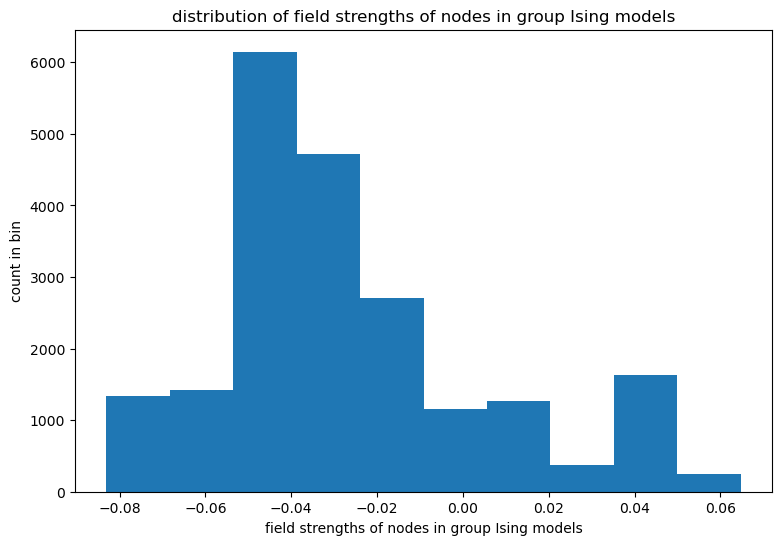

In [133]:
name = 'field strengths of nodes in group Ising models'
values = group_models.h
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of magnitudes of field strengths of nodes in group Ising models values has median 0.0388 with 95% CI [0.00424, 0.0724] and range [4.05e-05, 0.0831].


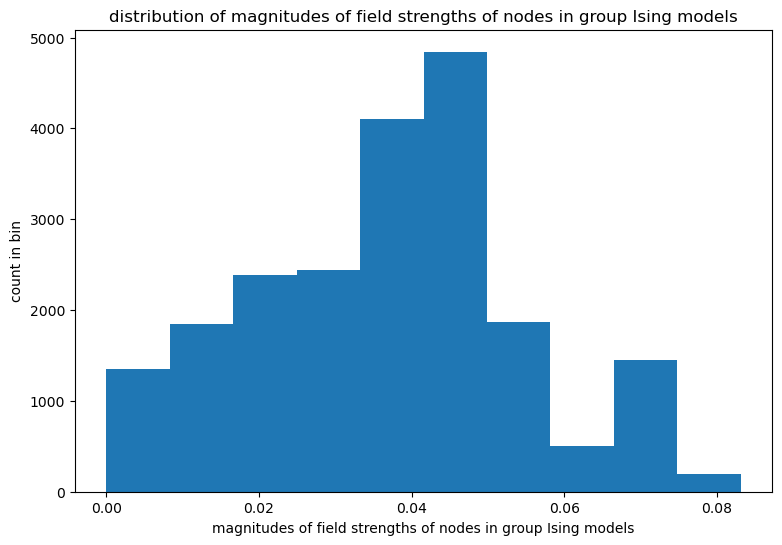

In [134]:
name = 'magnitudes of field strengths of nodes in group Ising models'
values = group_models.h.abs()
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of couplings of node pairs in group Ising models values has median 0.0532 with 95% CI [-0.123, 0.773] and range [-0.371, 1.37].


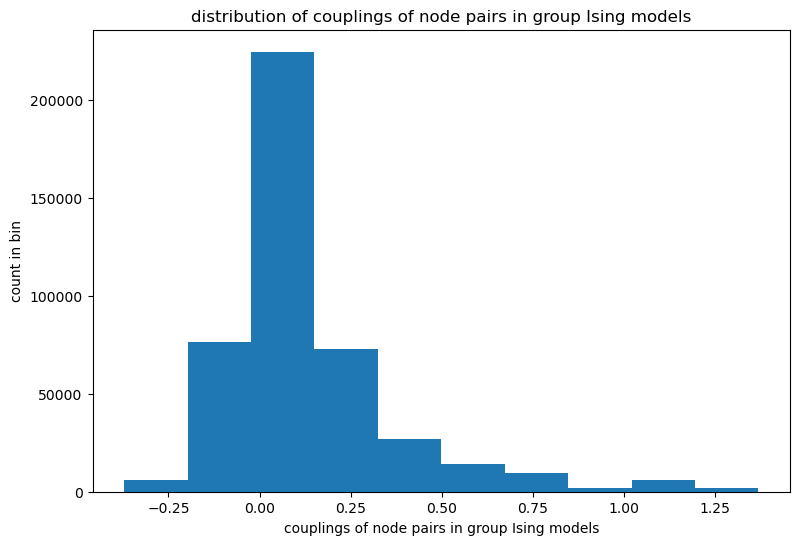

In [135]:
name = 'couplings of node pairs in group Ising models'
values = group_models.J_sym
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

The distribution of magnitude of couplings of node pairs in group Ising models values has median 0.0768 with 95% CI [0, 0.773] and range [0, 1.37].


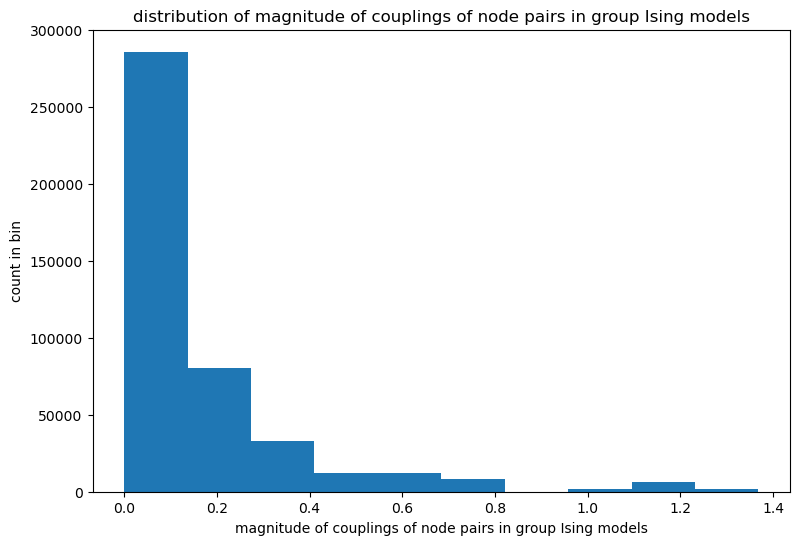

In [136]:
name = 'magnitude of couplings of node pairs in group Ising models'
values = group_models.J_sym.abs()
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

Mann-Whitney U size torch.Size([1000, 231])
The distribution of Mann-Whitney U stats of times of -1 values vs times of +1 values in individual subject time series values has median 1.49e+05 with 95% CI [1.21e+05, 1.76e+05] and range [9.18e+04, 2.01e+05].


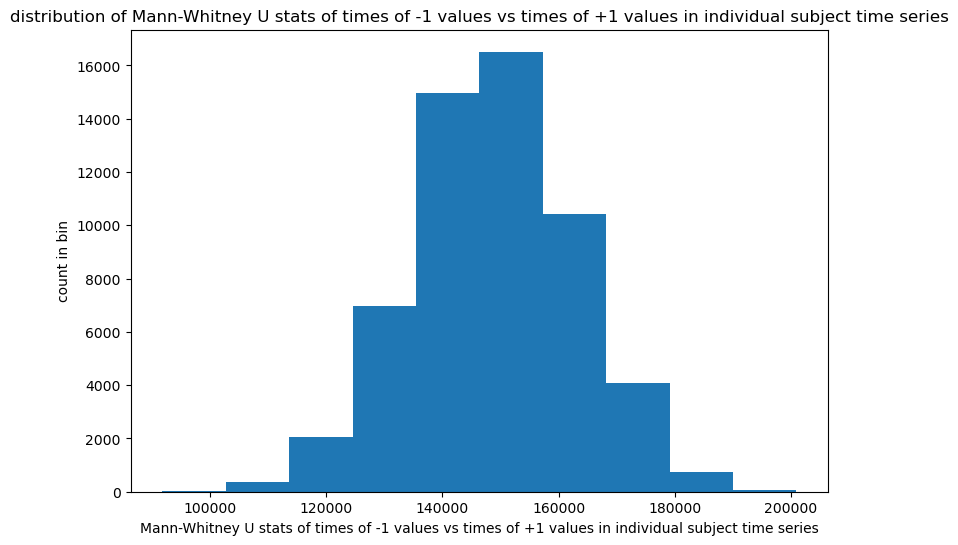

In [141]:
U = torch.load( os.path.join(results_dir, f'U_mann_whitney_individual_data_ts_training_threshold_0.1_nodes_21.pt') )
print( 'Mann-Whitney U size', group_params.size() )
name = 'Mann-Whitney U stats of times of -1 values vs times of +1 values in individual subject time series'
values = U
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

Mann-Whitney z size torch.Size([1000, 231])
The distribution of Mann-Whitney z scores of times of -1 values vs times of +1 values in individual subject time series values has median -4.97 with 95% CI [-9.03, -0.642] and range [-12.8, 3.59].


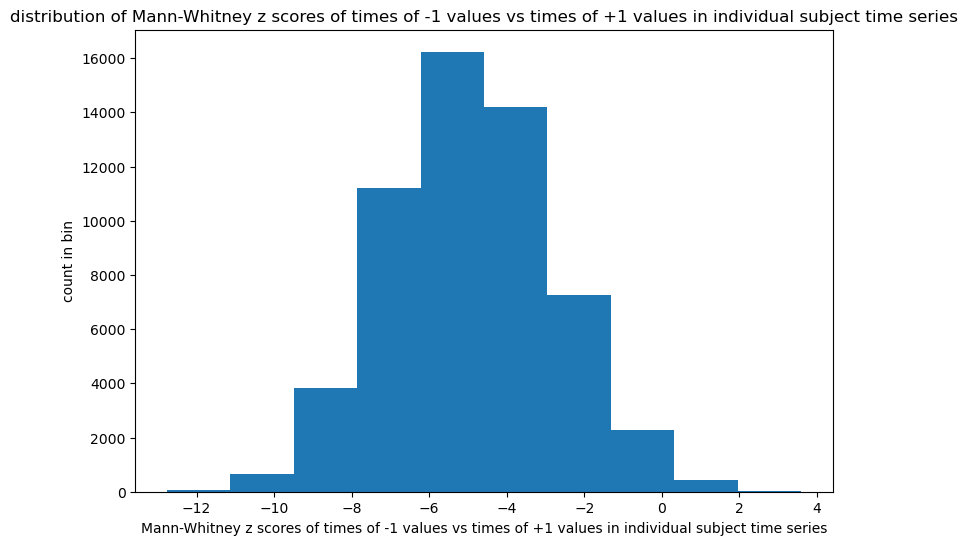

In [142]:
z = torch.load( os.path.join(results_dir, f'z_mann_whitney_individual_data_ts_training_threshold_0.1_nodes_21.pt') )
print( 'Mann-Whitney z size', group_params.size() )
name = 'Mann-Whitney z scores of times of -1 values vs times of +1 values in individual subject time series'
values = z
print_stats(name=name, values=values)
make_histogram(name=name, values=values)

In [153]:
window_convergence_results = torch.load( os.path.join(results_dir, f'window_convergence_test_mean_cov_fc_mean_std_min_max_rmse_subjects_validation_threshold_median.pt') )
print( 'window_convergence_results size', window_convergence_results.size() )
mean_mean_rmse = window_convergence_results[0,:]
std_mean_rmse = window_convergence_results[1,:]
min_mean_rmse = window_convergence_results[2,:]
max_mean_rmse = window_convergence_results[3,:]
window_lengths = torch.arange( 1, mean_mean_rmse.numel()+1, device=mean_mean_rmse.device )

window_convergence_results size torch.Size([4, 4800])


In [179]:
# error bar plot version without log of variances
def plot_range_std_mean_errorbars(axs, xlabel:str, ylabel:str, x:torch.Tensor, y_mean:torch.Tensor, y_std:torch.Tensor, y_min:torch.Tensor, y_max:torch.Tensor):
    # Find the errors for the extreme values.
    y_below_ext = y_mean - y_min
    y_above_ext = y_max - y_mean
    y_err_ext = torch.stack( (y_below_ext, y_above_ext), dim=0 )
    x_np = x.detach().cpu().numpy()
    y_mean_np = y_mean.log10().detach().cpu().numpy()
    # axs.errorbar( x=x_np, y=y_mean_np, yerr=y_err_ext.detach().cpu().numpy(), linestyle='', marker='.', markeredgecolor='r', label='range' )
    # axs.errorbar( x=x_np, y=y_mean_np, yerr=y_std.detach().cpu().numpy(), linestyle='', marker='.', markeredgecolor='g', label='standard deviation' )
    axs.plot(x_np, y_mean_np, linestyle='', marker='.', markeredgecolor='k', label='mean')
    axs.legend()
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(f'{ylabel} vs {xlabel}')

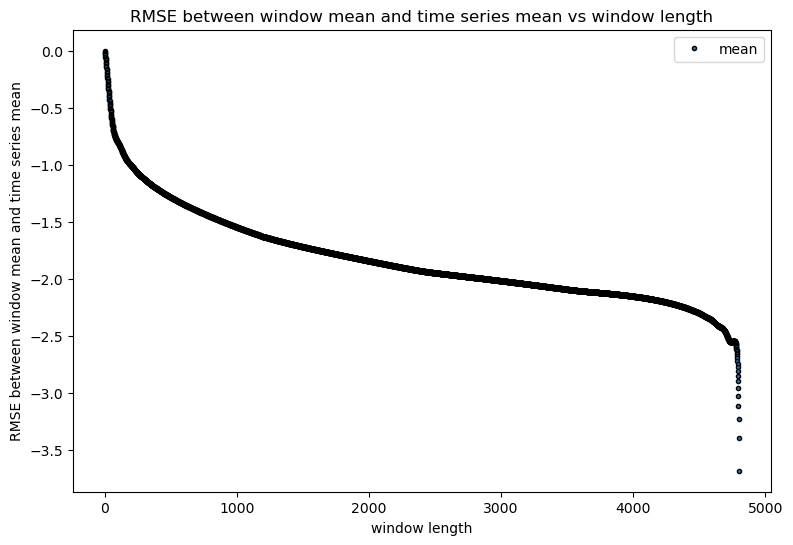

In [180]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
plot_range_std_mean_errorbars(axs, xlabel='window length', ylabel='RMSE between window mean and time series mean', x=window_lengths, y_mean=mean_mean_rmse, y_std=std_mean_rmse, y_min=min_mean_rmse, y_max=max_mean_rmse)

tensor(1179, device='cuda:0') tensor(3620, device='cuda:0')
tensor(0.1130, device='cuda:0')
The distribution of standard deviation of RMSE between window mean and time series mean values has median 0.00209 with 95% CI [0.000668, 0.0261] and range [0, 0.113].


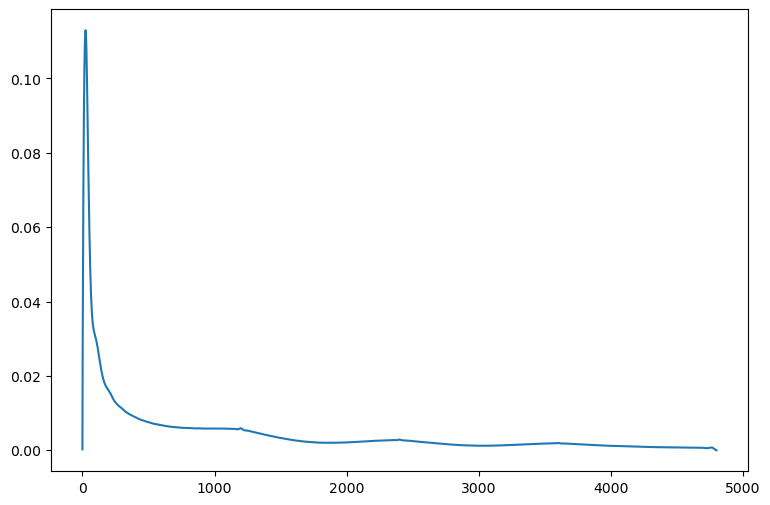

In [167]:
print( torch.count_nonzero(mean_mean_rmse > min_mean_rmse), torch.count_nonzero(mean_mean_rmse < min_mean_rmse) )
print( std_mean_rmse.max() )
name = 'standard deviation of RMSE between window mean and time series mean'
values = std_mean_rmse
print_stats(name=name, values=values)
# make_histogram(name=name, values=values)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( std_mean_rmse.detach().cpu().numpy() )

In [177]:
S = 669
T = 4800
N = 360
print(  S*(T**2)*( 2*(N**2) + N )/2  )

2000397772800000.0


In [184]:
for p in range(4):
    cutoff = 10**(-p)
    window = torch.nonzero( mean_mean_rmse < cutoff ).flatten()[0].item()+1
    print(f'RMSE < {cutoff:.4f} first achieved at window length {window}, {window/48:.3f} percent of the way through the data.')

RMSE < 1.0000 first achieved at window length 1, 0.021 percent of the way through the data.
RMSE < 0.1000 first achieved at window length 197, 4.104 percent of the way through the data.
RMSE < 0.0100 first achieved at window length 2885, 60.104 percent of the way through the data.
RMSE < 0.0010 first achieved at window length 4795, 99.896 percent of the way through the data.


In [201]:
N = 97.49
M = N + ( N*(N-1) )//2
print(M)

4800.49


In [212]:
code_start_time = time.time()
N = 4#97# 360
M = N + ( N*(N-1) )//2
T = 2**N# 4800
print(f'We have {M} parameters and {T} time points.')
log_P = torch.rand( (T,1), dtype=float_type, device=device ).log()
state_indices = torch.arange(T, dtype=torch.int, device=device).unsqueeze(dim=0)
state_periods = torch.special.exp2( torch.arange(N, dtype=torch.int, device=device) ).unsqueeze(dim=1)
R = torch.zeros( (N,T), dtype=torch.int, device=device )
for n in range(N):
    two_power = 2**n
    value = -1
    for t in range(T):
        if (t%two_power) == 0:
            value *= -1
        R[n,t] = value
print(f'filled in example states, time {time.time() - code_start_time}')
print( R[:10,:5] )
B = torch.zeros( (M,T), dtype=torch.int, device=device )
B[:N,:] = R
m = N
for i in range(N-1):
    for j in range(i+1,N):
        B[m,:] = R[i,:] * R[j,:]
        m += 1
print(f'created augmented state matrix, time {time.time() - code_start_time}')
# Find A that gets us closest to B^T*A = log_P
A = torch.linalg.lstsq( B.transpose(dim0=0,dim1=1).float(), log_P )
print(f'performed least squares to estimate parameters, time {time.time() - code_start_time}')
print(A)
# print( 'A size', A.size() )
# print( A[:5] )

We have 10 parameters and 16 time points.
filled in example states, time 0.004895210266113281
tensor([[ 1, -1,  1, -1,  1],
        [ 1,  1, -1, -1,  1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1,  1]], device='cuda:0', dtype=torch.int32)
created augmented state matrix, time 0.0068933963775634766
performed least squares to estimate parameters, time 0.011880159378051758
torch.return_types.linalg_lstsq(
solution=tensor([[-0.3203],
        [-0.3092],
        [ 0.2265],
        [-0.2769],
        [-0.2928],
        [-0.3598],
        [-0.3118],
        [-0.0437],
        [-0.6920],
        [-0.3177]], device='cuda:0'),
residuals=tensor([28.6973], device='cuda:0'),
rank=tensor([], device='cuda:0', dtype=torch.int64),
singular_values=tensor([], device='cuda:0'))


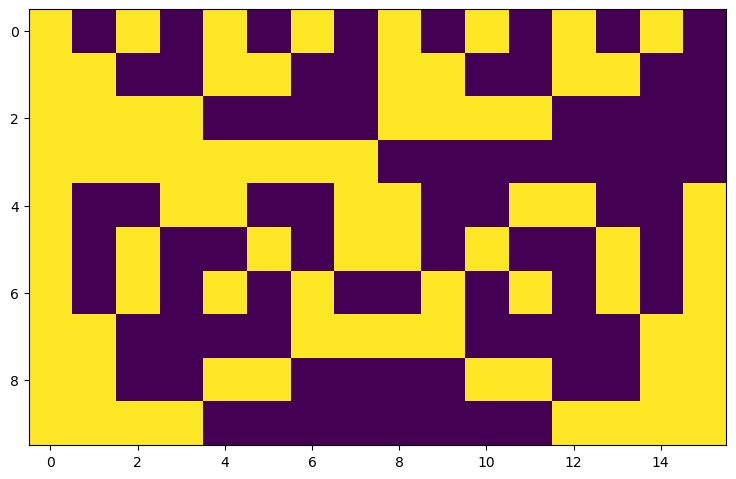

In [213]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( (B > 0).detach().cpu().numpy() )

We have 10 parameters and 1024 time points.
filled in example states, time 0.5316078662872314
tensor([[ 1, -1,  1, -1,  1],
        [ 1,  1, -1, -1,  1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1]], device='cuda:0', dtype=torch.int32)
created augmented state matrix, time 0.5485596656799316
performed least squares to estimate parameters, time 0.5525486469268799
torch.return_types.linalg_lstsq(
solution=tensor([[ 0.0467],
        [ 0.0187],
        [ 0.0101],
        [ 0.0471],
        [ 0.0106],
        [ 0.0291],
        [-0.0394],
        [ 0.0560],
        [ 0.0421],
        [ 0.0457]], device='cuda:0'),
residuals=tensor([2145.1572], device='cuda:0'),
rank=tensor([], device='cuda:0', dtype=torch.int64),
singular_values=tensor([], device='cuda:0'))


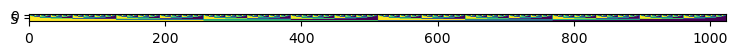

In [209]:
code_start_time = time.time()
N = 4# 360
M = N + ( N*(N-1) )//2
T = 2**M# 4800
print(f'We have {M} parameters and {T} time points.')
log_P = torch.rand( (T,1), dtype=float_type, device=device ).log()
state_indices = torch.arange(T, dtype=torch.int, device=device).unsqueeze(dim=0)
state_periods = torch.special.exp2( torch.arange(N, dtype=torch.int, device=device) ).unsqueeze(dim=1)
B = torch.zeros( (M,T), dtype=torch.int, device=device )
for n in range(M):
    two_power = 2**n
    value = -1
    for t in range(T):
        if (t%two_power) == 0:
            value *= -1
        B[n,t] = value
print(f'filled in example states, time {time.time() - code_start_time}')
print( B[:10,:5] )
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( (B > 0).detach().cpu().numpy() )
print(f'created augmented state matrix, time {time.time() - code_start_time}')
# Find A that gets us closest to B^T*A = log_P
A = torch.linalg.lstsq( B.transpose(dim0=0,dim1=1).float(), log_P )
print(f'performed least squares to estimate parameters, time {time.time() - code_start_time}')
print(A)
# print( 'A size', A.size() )
# print( A[:5] )

In [210]:
print(    torch.sum(   torch.special.exp2(  torch.arange(360, dtype=int, device=device) * torch.randint( low=0, high=2, size=(360,), dtype=int, device=device )  )   )    )

tensor(inf, device='cuda:0')


In [211]:
print(2**360)

2348542582773833227889480596789337027375682548908319870707290971532209025114608443463698998384768703031934976


In [214]:
params1 = [0.8533806204795837, 0.18156909942626953, -1.6931467056274414, 0.8250026106834412, -1.3108320236206055, 0.7371716499328613, -0.05742046609520912, 0.8006052374839783, -0.9061891436576843, 0.19300352036952972]
params2 = [ 0.0452, -0.0501, -0.0571, 0.0497, -0.0543, -0.0406, 0.0459, 0.0468, -0.0521, -0.0455]
print( [x2/x1 for (x1, x2) in zip(params1, params2) ] )

[0.05296581491925426, -0.27592800844586607, 0.03372418929217362, 0.060242233607997894, 0.04142407190359889, -0.05507536813671237, -0.7993665520564222, 0.05845577546691551, 0.05749351596699434, -0.23574699525109427]


In [216]:
print(  torch.matmul( -B.transpose(dim0=0, dim1=1).float(), torch.tensor(params2, device=device).unsqueeze(dim=1) )   )

tensor([[ 0.1121],
        [ 0.1045],
        [-0.1073],
        [ 0.1023],
        [-0.0807],
        [ 0.0741],
        [-0.4873],
        [-0.1153],
        [ 0.1081],
        [-0.0831],
        [ 0.0971],
        [ 0.1231],
        [ 0.0973],
        [ 0.0685],
        [-0.1009],
        [ 0.0875]], device='cuda:0')
